# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [273]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [274]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
print(X.shape)
print(y.shape)
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']
print(X_test.shape)
print(y_test.shape)

(784, 200)
(1, 200)
(784, 1991)
(1, 1991)


In [275]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

i=0 E=22.0
i=1 E=22.0
i=2 E=22.0
i=3 E=22.0
i=4 E=21.0
i=5 E=12.0
i=6 E=7.0
i=7 E=7.0
[22.0, 22.0, 22.0, 22.0, 21.0, 12.0, 7.0, 7.0]
lmbda = 100.0, E_Train = 0.0, E_Test = 0.8558513309894525


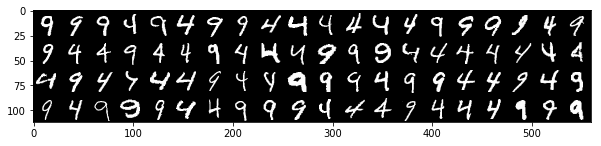

In [202]:
show_digit(X)
# Do feature normalization here
# begin answer
X = np.array(X, dtype=np.float)
X_test = np.array(X_test, dtype=np.float)
P, N = X.shape
Pt, Nt = X_test.shape
for i in range(P):
    if(np.std(X[i])==0):
        X[i] = 0
        continue
    X[i] = (X[i] - np.mean(X[i]))/np.std(X[i])
for i in range(Pt):
    if(np.std(X_test[i])==0):
        X_test[i] = 0
        continue
    X_test[i] = (X_test[i] - np.mean(X_test[i])) / np.std(X_test[i])
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
L = len(lmbdas)
E = np.zeros(len(lmbdas))
ws = np.zeros((P + 1, L))
E_val_min = float('inf')
b = np.ones((1, N))
x = np.vstack((b, X))
bt = np.ones((1, Nt))
xt = np.vstack((bt, X_test))
y = y[0]
from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(x, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=0)
        w = ridge(X_, y_, lmbdas[i])
        a = np.array([x[:, j]])
        f = np.dot(w.T, a.T)
        g = np.dot(f, y[j])
        if  g <= 0:
             E_val = E_val + 1
    E[i] = E_val
    print('i={} E={}'.format(i, E[i]))
    for k in range(P+1):
        ws[k, i] = w[k]

    # Update lmbda according validation error
    # begin answer
    # end answer
    
# Compute training error
E = np.array(E).tolist()
print(E)
index = E.index(min(E))
print('lambda = {}'.format(lmbdas[index]))

lmbda = 0.001,w2=[[1.02024411]], E_Train = 0.0, E_Test = 0.12606730286288298
lmbda = 0.01,w2=[[1.01815724]], E_Train = 0.0, E_Test = 0.12606730286288298
lmbda = 0.1,w2=[[0.99790035]], E_Train = 0.0, E_Test = 0.12405826217980914
lmbda = 0.0,w2=[[1.0204767]], E_Train = 0.0, E_Test = 0.12606730286288298
lmbda = 1.0,w2=[[0.84157147]], E_Train = 0.0, E_Test = 0.11200401808136615
lmbda = 10.0,w2=[[0.40691404]], E_Train = 0.0, E_Test = 0.08689100954294325
lmbda = 100.0,w2=[[0.13289524]], E_Train = 0.0, E_Test = 0.05976896032144651
lmbda = 1000.0,w2=[[0.03381315]], E_Train = 0.005, E_Test = 0.05826217980914113
[[5.47197231]]


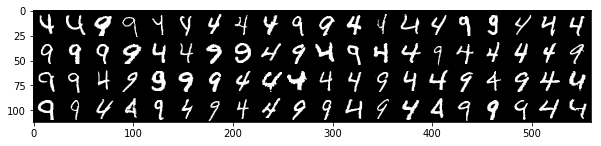

In [263]:
show_digit(X)
# Do feature normalization here
# begin answer
X = np.array(X, dtype=np.float)
X_test = np.array(X_test, dtype=np.float)
P, N = X.shape
Pt, Nt = X_test.shape
for i in range(P):
    if(np.std(X[i])==0):
        X[i] = 0
        continue
    X[i] = (X[i] - np.mean(X[i]))/np.std(X[i])
for i in range(Pt):
    if(np.std(X_test[i])==0):
        X_test[i] = 0
        continue
    X_test[i] = (X_test[i] - np.mean(X_test[i])) / np.std(X_test[i])
# end answer

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
b = np.ones((1, N))
x = np.vstack((b, X))
bt = np.ones((1, Nt))
xt = np.vstack((bt, X_test))
y = y[0]
y_test = y_test[0]
from ridge import ridge

K = np.array([[0.]])
for i in range(len(lmbdas)):
    E_Train = E_Test = 0
    w = ridge(x, y, lmbdas[i])
    w2 = np.dot(w.T, w)
    K += w2
    for j in range(N):
        s1 = np.dot(w.T, x[:,j].reshape(-1,1))
        if(s1 * y[j] < 0):
            E_Train += 1
    E_Train = E_Train/N
    for j in range(Nt):
        s1t = np.dot(w.T, xt[:, j].reshape(-1,1)) 
        if(s1t * y_test[j] < 0):
            E_Test += 1
    E_Test = E_Test/Nt
    lmbda = lmbdas[i]
    print('lmbda = {},w2={}, E_Train = {}, E_Test = {}'.format(lmbda, w2,E_Train, E_Test))

print(K)

### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

[27.0, 27.0, 27.0, 27.0, 26.0, 18.0, 8.0, 26.0]
lambda = 100.0


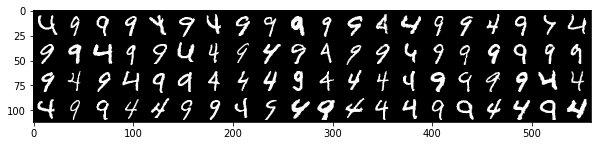

In [271]:
show_digit(X)
# Do feature normalization here
# begin answer
X = np.array(X, dtype=np.float)
X_test = np.array(X_test, dtype=np.float)
P, N = X.shape
Pt, Nt = X_test.shape
for i in range(P):
    if(np.std(X[i])==0):
        X[i] = 0
        continue
    X[i] = (X[i] - np.mean(X[i]))/np.std(X[i])
for i in range(Pt):
    if(np.std(X_test[i])==0):
        X_test[i] = 0
        continue
    X_test[i] = (X_test[i] - np.mean(X_test[i])) / np.std(X_test[i])
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
L = len(lmbdas)
E = np.zeros(len(lmbdas))
ws = np.zeros((P + 1, L))
E_val_min = float('inf')
b = np.ones((1, N))
x = np.vstack((b, X))
bt = np.ones((1, Nt))
xt = np.vstack((bt, X_test))
y = y[0]

from logistic_r import logistic_r

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(x, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=0)
        w = logistic_r(X_, y_, lmbdas[i])
        a = np.array([x[:, j]])
        f = np.dot(w.T, a.T)
        g = np.dot(f, y[j])
        if  g <= 0:
             E_val = E_val + 1
    E[i] = E_val

    # Update lmbda according validation error
    # begin answer
    # end answer
    
# Compute training error
E = np.array(E).tolist()
print(E)
index = E.index(min(E))
print('lambda = {}'.format(lmbdas[index]))

lmbda = 0.001,w2=[[560.7122038]], E_Train = 0.03, E_Test = 0.16323455549974886
lmbda = 0.01,w2=[[558.68807871]], E_Train = 0.03, E_Test = 0.16323455549974886
lmbda = 0.1,w2=[[538.84572545]], E_Train = 0.03, E_Test = 0.16223003515821197
lmbda = 0.0,w2=[[560.93756031]], E_Train = 0.03, E_Test = 0.16323455549974886
lmbda = 1.0,w2=[[375.44064949]], E_Train = 0.03, E_Test = 0.15720743345052737
lmbda = 10.0,w2=[[10.62900638]], E_Train = 0.0, E_Test = 0.11049723756906077
lmbda = 100.0,w2=[[0.22948059]], E_Train = 0.01, E_Test = 0.05976896032144651
lmbda = 1000.0,w2=[[0.01613665]], E_Train = 0.07, E_Test = 0.10748367654445003
[[2605.49884138]]


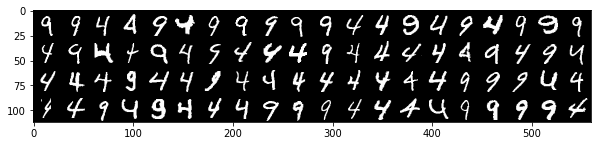

In [276]:
show_digit(X)
# Do feature normalization here
# begin answer
X = np.array(X, dtype=np.float)
X_test = np.array(X_test, dtype=np.float)
P, N = X.shape
Pt, Nt = X_test.shape
for i in range(P):
    if(np.std(X[i])==0):
        X[i] = 0
        continue
    X[i] = (X[i] - np.mean(X[i]))/np.std(X[i])
for i in range(Pt):
    if(np.std(X_test[i])==0):
        X_test[i] = 0
        continue
    X_test[i] = (X_test[i] - np.mean(X_test[i])) / np.std(X_test[i])
# end answer

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
b = np.ones((1, N))
x = np.vstack((b, X))
bt = np.ones((1, Nt))
xt = np.vstack((bt, X_test))
y = y[0]
y_test = y_test[0]
from logistic_r import logistic_r

K = np.array([[0.]])
for i in range(len(lmbdas)):
    E_Train = E_Test = 0
    w = logistic_r(x, y, lmbdas[i])
    w2 = np.dot(w.T, w)
    K += w2
    for j in range(N):
        s1 = np.dot(w.T, x[:,j].reshape(-1,1))
        if(s1 * y[j] < 0):
            E_Train += 1
    E_Train = E_Train/N
    for j in range(Nt):
        s1t = np.dot(w.T, xt[:, j].reshape(-1,1)) 
        if(s1t * y_test[j] < 0):
            E_Test += 1
    E_Test = E_Test/Nt
    lmbda = lmbdas[i]
    print('lmbda = {},w2={}, E_Train = {}, E_Test = {}'.format(lmbda, w2,E_Train, E_Test))

print(K)